**Step 1. Project Description**
The problem that we will look at in this project is the Boston house price dataset (This dataset is also used in chapter 3 of our text book).

We have download the dataset for free and placed it in the project directory with the filename “housing.csv“. You can also directly download the dataset:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data 

The dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. Input attributes include things like crime rate, proportion of nonretail business acres, chemical concentrations and more.

This is a well-studied problem in machine learning. It is convenient to work with because all of the input and output attributes are numerical and there are 506 instances to work with.

Reasonable performance for models evaluated using Mean Squared Error (MSE) are around 20 in squared thousands of dollars (or $4,500 if you take the square root). This is a nice target to aim for with our neural network model.




**Step 2. Develop a Baseline Neural Network Model**
In this step we will create a baseline neural network model for the regression problem.

Let’s start off by including all of the functions and objects we will need for this tutorial.

In [2]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold


In [3]:
from keras import models
from keras import layers

In [4]:
#uploading csv file

from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [5]:
#Importing file

import io
data = io.BytesIO(uploaded['housing.csv'])

In [6]:
# load dataset
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [7]:
dataframe[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [8]:
Y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [11]:
def baseline_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(13, activation='relu',
                           input_shape=(13,)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [12]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)


In [13]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Results: -41.19 (22.58) MSE


**Step 3: Modeling The Standardized Dataset**

In [14]:
# evaluate model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Standardized: -26.99 (35.63) MSE


**Extension of Step 3:**
A further extension of this step is to similarly apply a rescaling to the output variable such as
normalizing it to the range of 0-1 and use a Sigmoid or similar activation function on the
output layer to narrow output predictions to the same range.

In [17]:
  #output is going to be in the rangge of 0 to 1
  
  def baseline_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(13, activation='relu',
                           input_shape=(13,)))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [18]:
# evaluate model with standardized dataset and the output is in the range of 0-1
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Standardized: -546.50 (276.40) MSE


**Step 4. Tune The Neural Network Topology
**

***Step 4.1. Evaluate a Deeper Network Topology***

In [21]:
def larger_model():
	# create model
  model = models.Sequential()
  model.add(layers.Dense(13, activation='relu',
                         input_shape=(13,)))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1))
  
	# Compile model
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model



In [22]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -24.52 (35.48) MSE


***Step 4.2. Evaluate a Wider Network Topology***

In [26]:
# define wider model
def wider_model():
  model = models.Sequential()
  model.add(layers.Dense(20, activation='relu',
                         input_shape=(13,)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [27]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -21.13 (22.34) MSE


In [31]:
results

array([ -9.47291831,  -9.27974036, -15.09825179, -30.52734585,
       -12.45906943,  -9.84783289,  -4.02700531, -84.90277891,
       -19.51676261, -16.16688589])

**Step 5. Really Scaling up: developing a model that overfits
**

In [69]:
import numpy as np
val_loss=[]
train_loss=[]
mean_absolute_error=[]
val_mean_absolute_error=[]
np.random.seed(seed)
num_of_epochs=200
def model_define():
  model = models.Sequential()
  model.add(layers.Dense(20, activation='relu',
                         input_shape=(13,)))
  model.add(layers.Dense(10,activation='relu'))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1))
  
	# Compile model
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model
kfold = KFold(n_splits=10, random_state=seed)
#kfold.splits(X,Y)
for train_index , test_index in kfold.split(X,Y):
    model=model_define()
    history=model.fit(X[train_index],Y[train_index],epochs=num_of_epochs,batch_size=5,verbose=0,
                     validation_data=(X[test_index],Y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    mean_absolute_error.append(history.history['mean_absolute_error'])

    val_mean_absolute_error.append(history.history['val_mean_absolute_error'])

In [71]:
print("validation loss is :",np.mean(np.mean(val_loss,axis=0)))

('validation loss is :', 47.311366706238104)


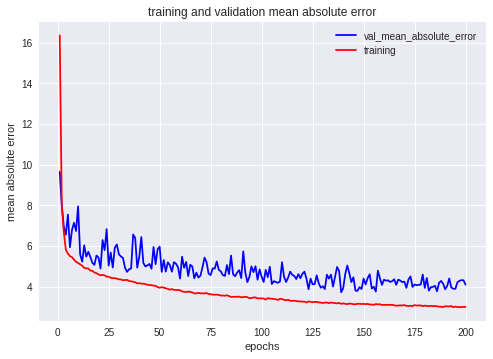

In [72]:
import matplotlib.pyplot as plt

epochs= range(1,num_of_epochs + 1)

# b is for "solid blue line"
plt.plot(epochs, np.mean(val_mean_absolute_error,axis=0), 'b', label='val_mean_absolute_error')
# bo is for "blue dot"
plt.plot(epochs,np.mean(mean_absolute_error,axis=0), 'r', label='training')
plt.title('training and validation mean absolute error')
plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.legend()

plt.show()

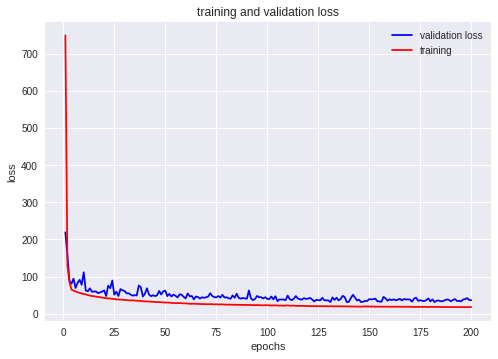

In [73]:
import matplotlib.pyplot as plt

epochs= range(1,num_of_epochs + 1)

# b is for "solid blue line"
plt.plot(epochs, np.mean(val_loss,axis=0), 'b', label='validation loss')
# bo is for "blue dot"
plt.plot(epochs,np.mean(train_loss,axis=0), 'r', label='training')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

**Step 6. Tuning the Model
**

In [74]:
import numpy as np
val_loss=[]
train_loss=[]
mean_absolute_error=[]
val_mean_absolute_error=[]
np.random.seed(seed)
num_of_epochs=50
def model_define():
  model = models.Sequential()
  model.add(layers.Dense(20, activation='relu',
                         input_shape=(13,)))
  model.add(layers.Dense(10,activation='relu'))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1))
  
	# Compile model
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model
kfold = KFold(n_splits=10, random_state=seed)
#kfold.splits(X,Y)
for train_index , test_index in kfold.split(X,Y):
    model=model_define()
    history=model.fit(X[train_index],Y[train_index],epochs=num_of_epochs,batch_size=5,verbose=0,
                     validation_data=(X[test_index],Y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    mean_absolute_error.append(history.history['mean_absolute_error'])

    val_mean_absolute_error.append(history.history['val_mean_absolute_error'])

In [75]:
print("validation loss is :",np.mean(np.mean(val_loss,axis=0)))

('validation loss is :', 59.04994804142561)


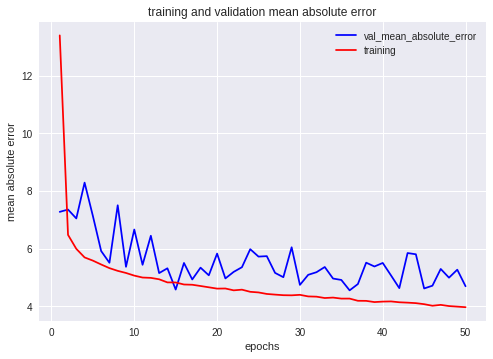

In [76]:
import matplotlib.pyplot as plt

epochs= range(1,num_of_epochs + 1)

# b is for "solid blue line"
plt.plot(epochs, np.mean(val_mean_absolute_error,axis=0), 'b', label='val_mean_absolute_error')
# bo is for "blue dot"
plt.plot(epochs,np.mean(mean_absolute_error,axis=0), 'r', label='training')
plt.title('training and validation mean absolute error')
plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.legend()

plt.show()

**Step 7. Rewriting the code using the Keras Functional API
**

In [79]:
# functional API

from sklearn.model_selection import KFold
from keras.layers import Input, Dense
from keras.models import Model

def functional_api():
  # This returns a tensor
  inputs = Input(shape=(13,))

  # a layer instance is callable on a tensor, and returns a tensor
  x = Dense(13, activation='relu')(inputs)
  predictions = Dense(1)(x)

  # This creates a model that includes
  # the Input layer and three Dense layers
  model = Model(inputs=inputs, outputs=predictions)
  model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
  return model


numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=functional_api, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("functional api model with 100 epoch: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


functional api with 100 epochs: -25.90 (36.30) MSE


**Step 8. Rewriting the code by doing Model Subclassing
**

In [10]:
import keras
from keras import layers
import tensorflow as tf
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel,self).__init__()
    self.dense1=tf.keras.layers.Dense(13,activation="relu")
    self.dense1=tf.keras.layers.Dense(6,activation="relu")
    self.dense2=tf.keras.layers.Dense(1)
  
  def call(self,inputs):
    x=self.dense1(inputs)
    return self.dense2(x)

model=MyModel()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist=model.fit(X,Y,epochs=4,batch_size=5)
hist



Epoch 1/4
506/506 [==============================] - 0s 491us/step - loss: -343.2843 - acc: 0.0000e+00
Epoch 2/4
506/506 [==============================] - 0s 191us/step - loss: -343.2843 - acc: 0.0000e+00
Epoch 3/4
506/506 [==============================] - 0s 187us/step - loss: -343.2843 - acc: 0.0000e+00
Epoch 4/4
506/506 [==============================] - 0s 175us/step - loss: -343.2843 - acc: 0.0000e+00


**Step 9. Rewriting the code without using scikit-learn
**

In [80]:
def keras_only():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(13, activation='relu',
                           input_shape=(13,)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [83]:
# k fold code

import numpy as np
k =10
num_val_samples = len(X) // k
num_epochs = 50
all_scores = []

#following lists have mean values at every k fold
val_loss=[]
train_loss=[]
mean_absolute_error=[]
val_mean_absolute_error=[]

#following 2 lists have the accuracies for every epoch
acc_epoch=[]
val_acc_epoch=[]

for i in range(k):
  print('processing fold #', i)
  val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [X[:i * num_val_samples],
  X[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [Y[:i * num_val_samples],
  Y[(i + 1) * num_val_samples:]],
  axis=0)
  model =keras_only()
  hist=model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=1,validation_data=(val_data,val_targets),verbose=0)
  
  #taking mean of acc and losses for plotting
  val_mean_absolute_error.append(np.mean(hist.history["val_mean_absolute_error"]))
  val_loss.append(np.mean(hist.history["loss"]))

  mean_absolute_error.append(np.mean(hist.history["mean_absolute_error"]))
  train_loss.append(np.mean(hist.history["loss"]))
  
  acc_epoch.append(hist.history["mean_absolute_error"])
  val_acc_epoch.append(hist.history["val_mean_absolute_error"])
  

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)
('processing fold #', 4)
('processing fold #', 5)
('processing fold #', 6)
('processing fold #', 7)
('processing fold #', 8)
('processing fold #', 9)
